# Predicting heart disease using machine learning model

This notebook looks into using many python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether someone has heart disease or not based on their medical attributes.

We are going to use following approach - 
1. Problem definition
2. Data we are going to use
3. Evaluation metrics needed
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement- 
> Give cliniocal parameters about a patient, can we predict whether the patient has heart disease or not

## 2. Data

The original data came from Cleveland data from UCI machinbe learning depository - https://archive.ics.uci.edu/dataset/45/heart+disease

There is also a version of it available on Kaggle - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation 

> If we can reach 95 % acuracy at predicting whether a patient has heart disease or not, during the proof of concept, we wil pursue the project

## 4. Features

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.at them later without coming back here.
  nually

Tags



## Preparing the tools

Importing numpy, pandas and matplotlib for data analysis and manipulation

In [1]:
# Importing all the tools

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
# for increasing the width of the cell
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 90% !important; }</style>"))


In [3]:
df = pd.read_csv("data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration(EDA - Exploratory Data Analysis)

The goal here is to find more about the data and become the subject matter expert on the data set you are working with - 

* What questions are you trying to solve
* What kind of data do we have and hwo to we treat diffrent types
* What's missing from the data and how do we deal with it
* Where are the outliers and why should you care about them
* How can you add or remove features to get more of your data

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

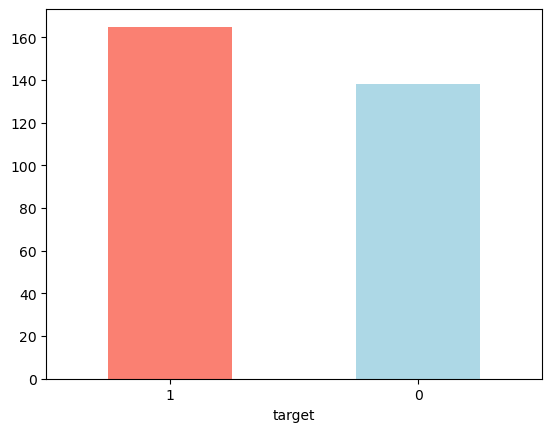

In [7]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"])
plt.xticks(rotation = 0);

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()  # gives us all the numeric data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

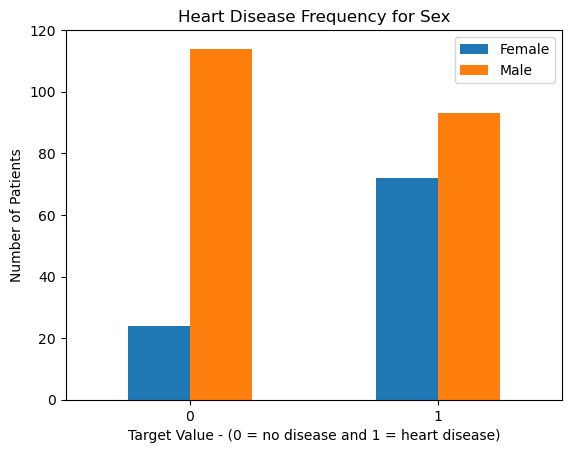

In [12]:
pd.crosstab(df.target, df.sex).plot(kind = "bar")
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Target Value - (0 = no disease and 1 = heart disease)")
plt.ylabel("Number of Patients")
plt.ylim(0,120)
plt.legend(labels = ["Female", "Male"])
plt.xticks(rotation = 0)

### Let's compare values of three columns - sex vs thalach(maximum heart rate achieved) w.r.t target



In [13]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

In [14]:
pd.crosstab(df["sex"], df["thalach"])

thalach,71,88,90,95,96,97,99,103,105,106,...,184,185,186,187,188,190,192,194,195,202
sex,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,1,1,1,1,0,1,2,3,0,...,1,1,2,1,1,1,0,1,1,1


[Text(0.5, 1.0, 'Age vs Maximum heart rate of people not having heart disease'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Maximum Heart Rate')]

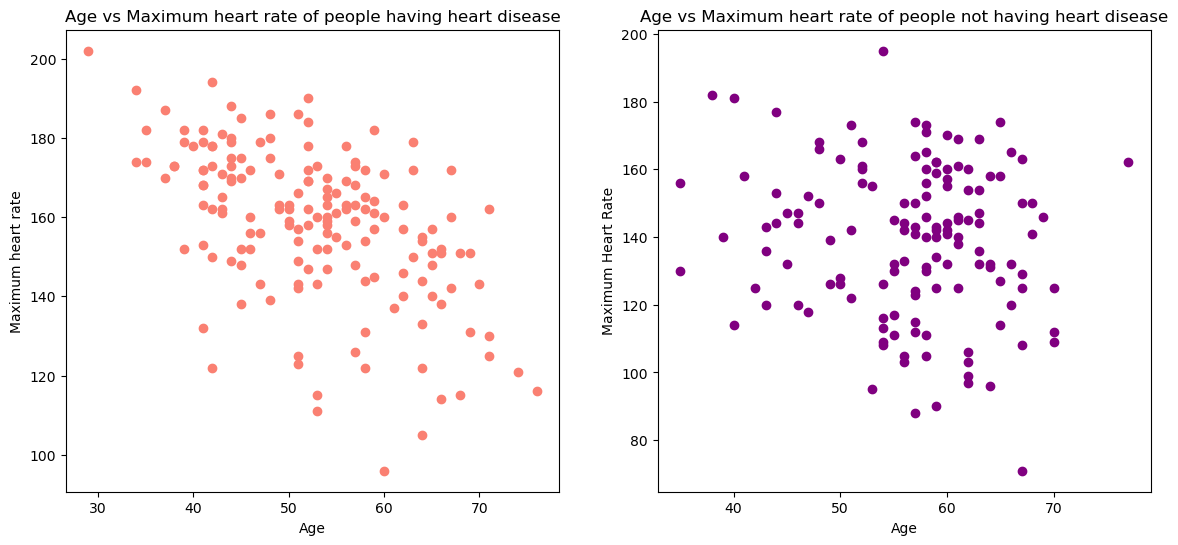

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

ax1.scatter(df.age[df.target==1], df.thalach[df.target==1], c = "salmon" )
ax1.set(title = "Age vs Maximum heart rate of people having heart disease", xlabel = "Age", ylabel = "Maximum heart rate")

ax2.scatter(df.age[df.target==0], df.thalach[df.target==0], c = "purple")
ax2.set(title = "Age vs Maximum heart rate of people not having heart disease", xlabel = "Age", ylabel = "Maximum Heart Rate")

[Text(0.5, 1.0, 'Age vs Maximum heart rate for people having heart disease or not'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Maximum heart rate')]

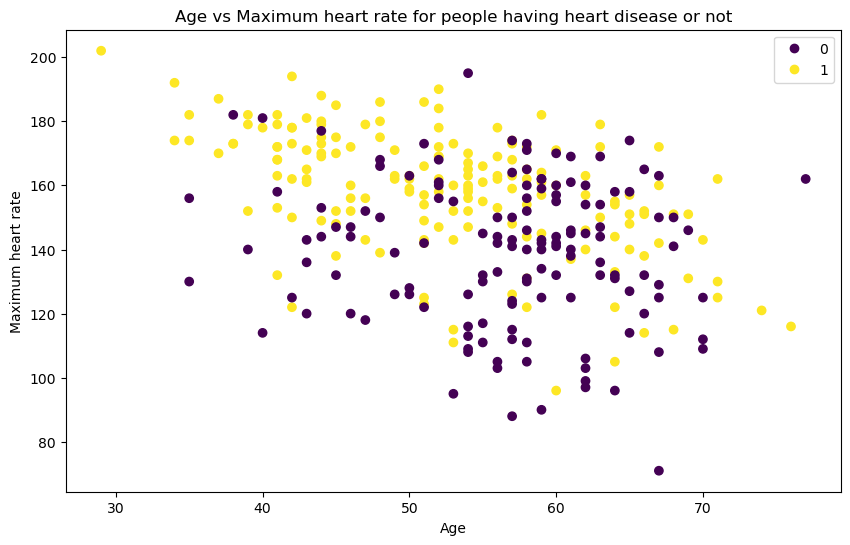

In [16]:
fig, ax = plt.subplots(figsize = (10,6))
scatter = ax.scatter(df.age, df.thalach, c = df.target )
ax.legend(*scatter.legend_elements())
ax.set(title = "Age vs Maximum heart rate for people having heart disease or not", xlabel = "Age", ylabel = "Maximum heart rate" )

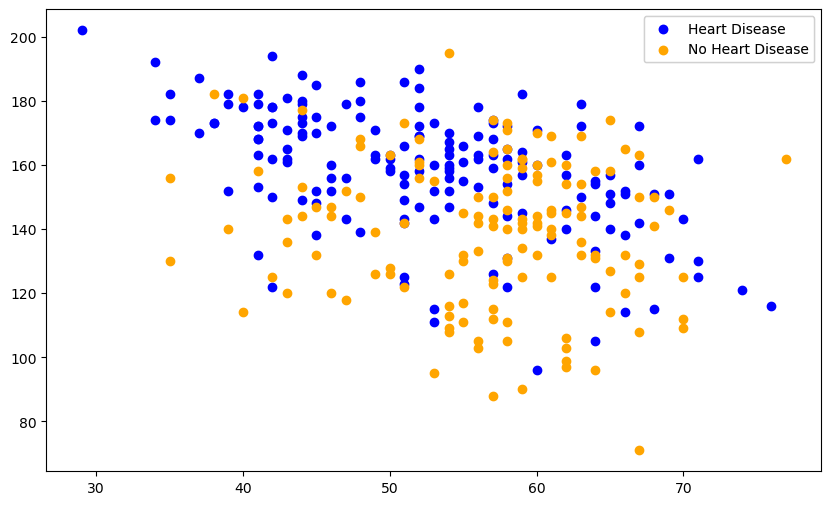

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with different colors
scatter_hd = ax.scatter(df[df.target==1].age, df[df.target==1].thalach, c='blue', label='Heart Disease')
scatter_no_hd = ax.scatter(df[df.target==0].age, df[df.target==0].thalach, c='orange', label='No Heart Disease')

# Create the legend
legend1 = ax.legend(handles=[scatter_hd, scatter_no_hd], loc="upper right")
ax.add_artist(legend1)

<Axes: ylabel='Frequency'>

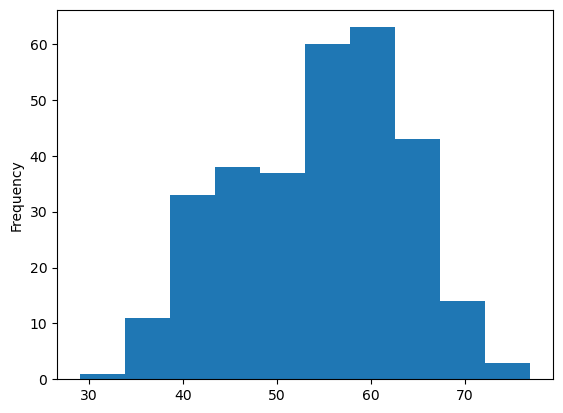

In [18]:
# check the distribution of the age column with histogram
df["age"].plot.hist()

In [19]:
df.age.min(), df.age.max()

(29, 77)

### Heart disease frequency wrt chest pain type

3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [20]:
df.cp.value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

Text(0, 0.5, 'No. of patients')

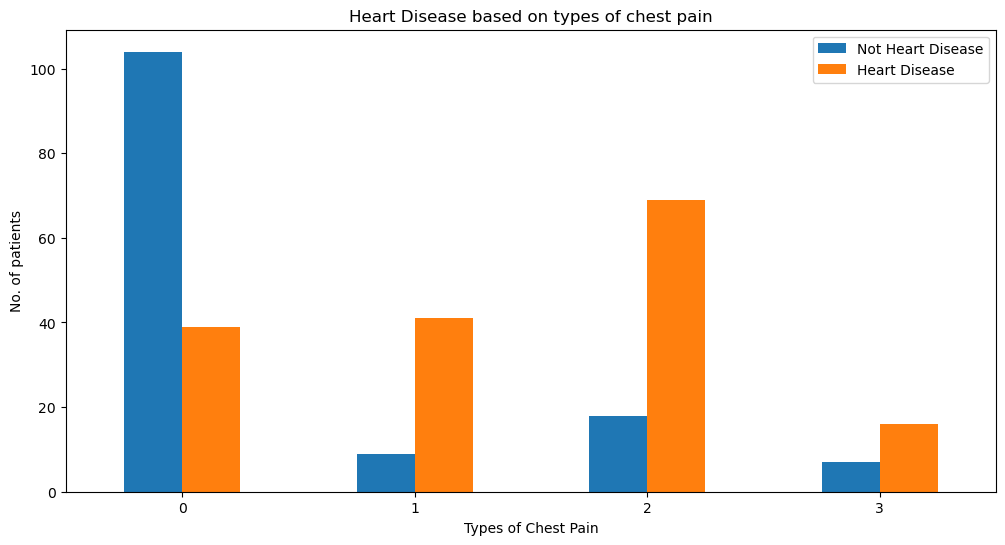

In [21]:
pd.crosstab(df.cp,df.target ).plot(kind = "bar", figsize = (12,6))
plt.xticks(rotation = 0)
plt.legend(labels = ["Not Heart Disease", "Heart Disease"])
plt.title("Heart Disease based on types of chest pain")
plt.xlabel("Types of Chest Pain")
plt.ylabel("No. of patients")

In [22]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


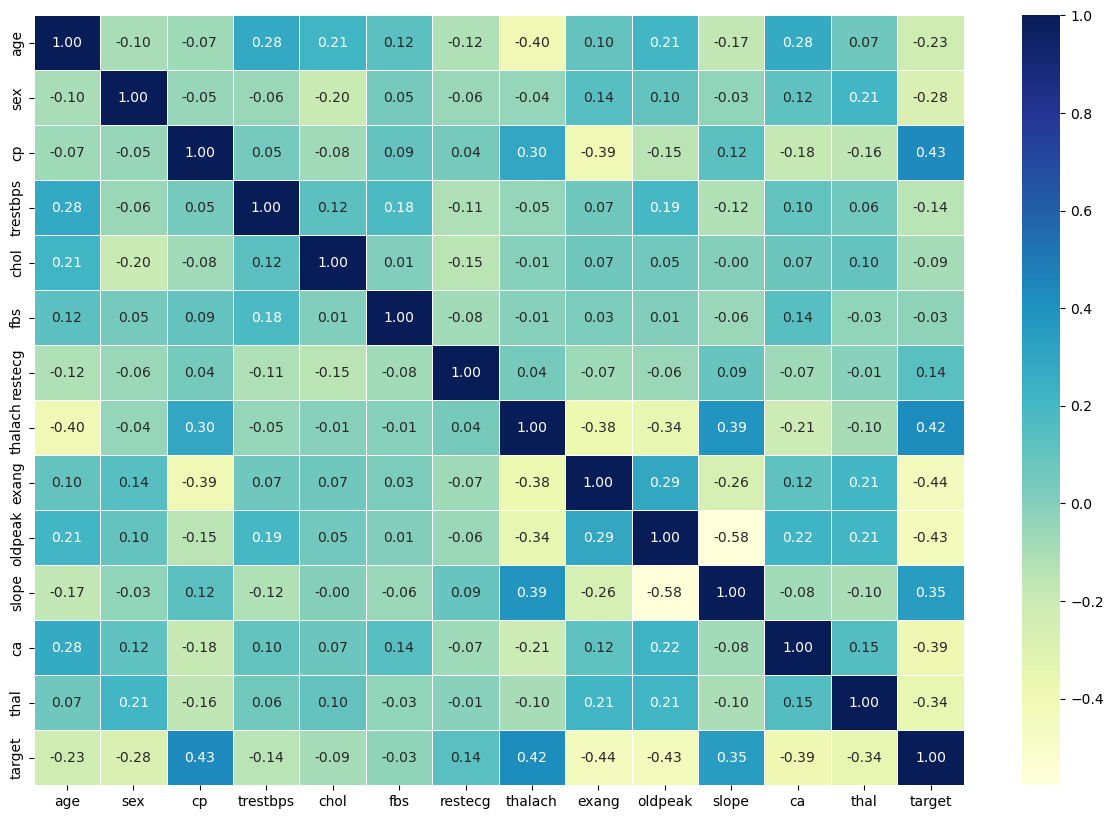

In [23]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths=0.5,
                 cmap = "YlGnBu",
                 fmt= ".2f")

## 5. Modelling

In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
# split into X and y
X = df.drop("target", axis = 1)
y = df["target"]



In [26]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
#split our data into train and test split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

**now we get our data ready into trsin and test split, it's time to figure out the model suiting our data**

*as we are using classification data, let's try different classification model*

In [29]:
# Put models in a dictionary
models = {"LogisticRegression" : LogisticRegression(max_iter=1000),
          "NearestNeighbours" : KNeighborsClassifier(),
          "RandomForestClassifier" : RandomForestClassifier()}

# Create a function to fit and score a model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluate the given machine learning models
    models: A dictionary of different machine learning models
    X_train: training data(no labels)
    X_test: test data(no labels)
    y_train: training labels
    y_test: test labels
    
    '''
    
    # Setting up random seed
    np.random.seed(42)
    # Create dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores










In [30]:
model_score = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_score

{'LogisticRegression': 0.8852459016393442,
 'NearestNeighbours': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model Comparison

In [31]:
compare_model = pd.DataFrame(model_score, index = ["Accuracy"])
compare_model

,LogisticRegression,NearestNeighbours,RandomForestClassifier
Accuracy,0.885246,0.688525,0.836066


(array([0, 1, 2]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'NearestNeighbours'),
  Text(2, 0, 'RandomForestClassifier')])

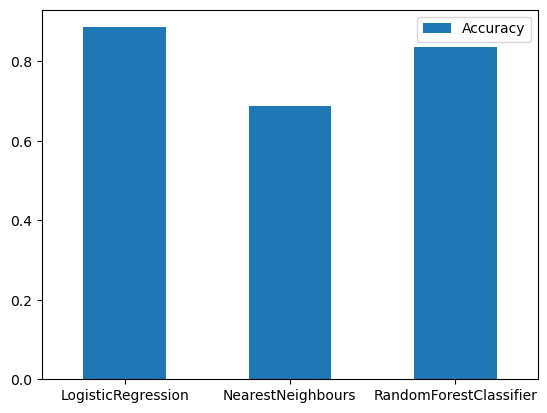

In [32]:
compare_model.T.plot.bar()
plt.xticks(rotation = 0)

Now we have a baseline model and we know the model's first prediction is never the last
So, what to do?

1. Hyperparameter tuning
2. Feature Importance
3. Confusion Matrix
4. Cross validation
5. precision
6. recall
7. F1 score
8. classification report
9. ROC curve
10. Area under the curve


### Hyperparameter Tuning

In [33]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list for different values of n_neighbors

neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train,y_train)

    # Update the train_scores and test_scores
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [34]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [35]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is: 75.41%


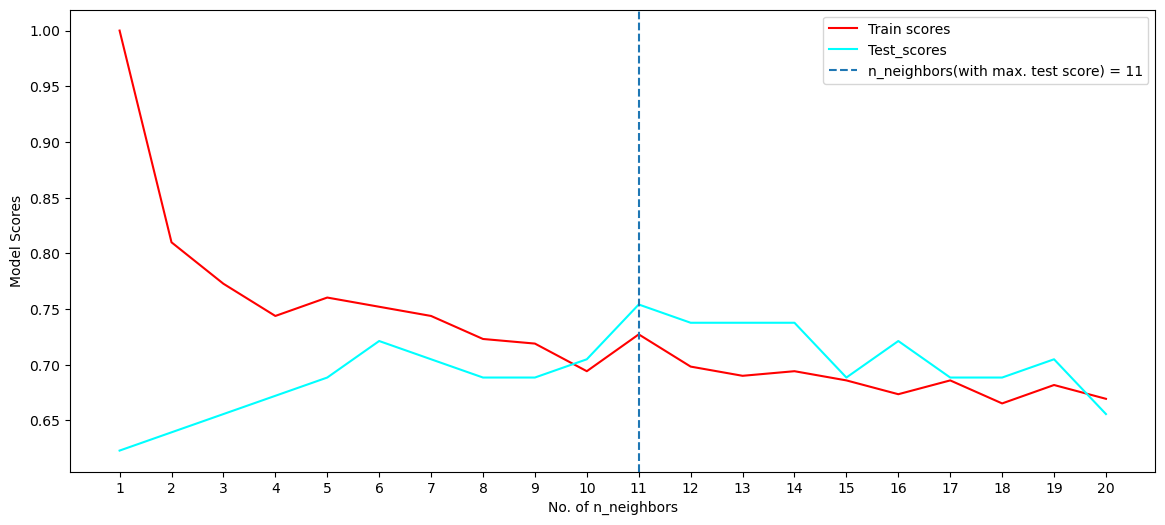

In [36]:
plt.figure(figsize=(14,6))
plt.plot(neighbors, train_scores, label = "Train scores", c = "Red")
plt.plot(neighbors, test_scores, label = "Test_scores", c = "Cyan")
plt.xticks(range(1,21))
plt.xlabel("No. of n_neighbors")
plt.ylabel("Model Scores")
plt.axvline(x = 11, linestyle = "--", label = f'n_neighbors(with max. test score) = 11' )
plt.legend()

print(f'Maximum KNN score on the test data is: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with randomizedsearchCV

We are going to tune - 
* Logistic Regression
* Random Forest Classifier

In [37]:
# Create a hyperparameter grid for logistic Regression

log_reg_grid = {"C" : np.logspace(-5,5,20),
                "solver" : ["liblinear"]}

# Create a hyperparameter grid for Random forest classifier

rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth" : [None, 2,3,4],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(2,20,2)}


In [38]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)
# Fit random hyperparameter search model for logistic regression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1623776739188721}

In [40]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

 *Now we have tuned logistic regression model but it does'nt shows any improvement*

**Let's try Random Forest Classifier**

### Hyperparameter tuning using Random Forest classifier


In [41]:
np.random.seed(42)

# Setup random hyperparameter search for random forest classifier
rs_rfc = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv = 5, 
                            n_iter = 20,
                            verbose = True
                            )
# Fit random hyperparameter search model for random forest calssifier

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 3, 4],
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rfc.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 2}

In [43]:
rs_rfc.score(X_test, y_test)

0.8688524590163934

### Tuning hyperparameters using GridSearchCV

In [44]:
# Different hyperparameters for our Logistic Regression Model
log_reg_grid = {"C" : np.logspace(-4,4,30),
                "solver" : ["liblinear"]}

# Setup grid hyperparmaeter search for Logistic regression model
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = True,
                          )
# Fit our grid hyperparameter search model for Logistic Regression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [45]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [47]:
# Different hyperparameters for our Random Forest Classifier
rf_grid = {"n_estimators" : np.arange(50,1000, 50),
           "max_depth" : [None,2,3,4],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(2,20,2)}

# Setup grid hyperparameters search for Random Forest Classifier
rf_rfc = GridSearchCV(RandomForestClassifier(),
                      param_grid = rf_grid,
                      cv = 5,
                      verbose = True)

#rf_rfc.fit(X_train, y_train)

## Evaluating our tuned machine learning model beyond accuracy using the following wvaluation metrics - 

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 score

  **Use cross validation wherever possible**

In [48]:
# Make predictions with our tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
print(y_test.shape)
print(y_preds.shape)

(61,)
(61,)


### ROC curve AUC curve

In [50]:
# import roc curve functionb from sklearn
from sklearn.metrics import RocCurveDisplay


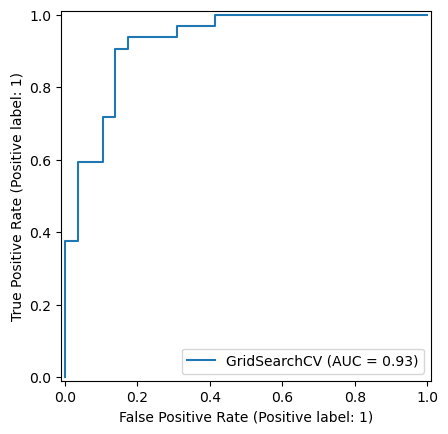

In [51]:
# plot ROC curve and calculate AUC metric

plot_ROC = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

### Confusion matrix

In [52]:
#import the confusion matrix function
from sklearn.metrics import confusion_matrix

In [53]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


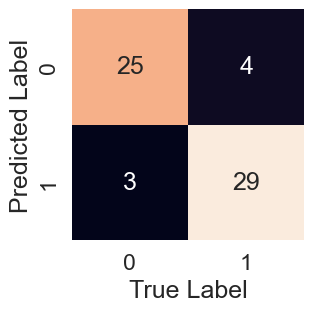

In [54]:
# let's make it visually better
import seaborn as sns

sns.set(font_scale = 1.5)

def plot_conf_matrix(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)

    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_matrix(y_test, y_preds)



### Clasification report

In [55]:
# import classification report
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross validation

We are going to calculate accuracy, precision, recall, F1 score of our model using cross validation method using `cross_val_score`


In [57]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
# Insantiate theh model with the best hyperparameters

clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")

In [59]:
# cross validated acuracy

cv_acc = cross_val_score(clf, 
                         X,
                         y, 
                         cv = 5,
                         scoring = "accuracy")

cv_acc = cv_acc.mean()

In [60]:
# cross validated precision

cv_prec = cross_val_score(clf, 
                         X,
                         y, 
                         cv = 5,
                         scoring = "precision")
cv_prec = cv_prec.mean()

In [61]:
# cross validated recall score

cv_recall = cross_val_score(clf, 
                         X,
                         y, 
                         cv = 5,
                         scoring = "recall")
cv_recall = cv_recall.mean()

In [62]:
# cross validated F1 score

cv_f1 = cross_val_score(clf, 
                         X,
                         y, 
                         cv = 5,
                         scoring = "f1")
cv_f1 = cv_f1.mean()

In [63]:
# Visualise our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc ,
                           "Precision" : cv_prec,
                           "Recall" : cv_recall,
                           "F1_score" : cv_f1},
                            index =[0])

In [64]:
cv_metrics

,Accuracy,Precision,Recall,F1_score
0,0.844699,0.820794,0.921212,0.867301


Text(0.5, 1.0, 'Cross Validated Classification metrics')

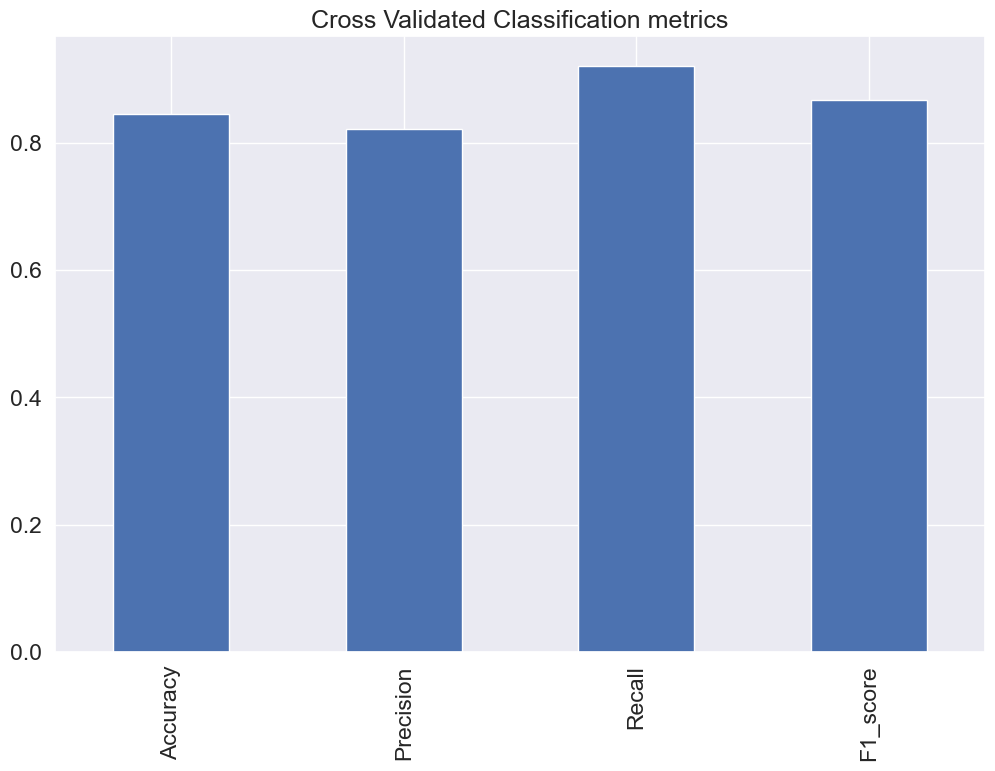

In [65]:
cv_metrics.T.plot.bar(figsize = (12,8), legend = False)

plt.title("Cross Validated Classification metrics")




### Feature Importance

Feature importance is asking: "Which feature contibutes the most to the outcomes of the model and how did they contribute."

Finding feature importance is different for each machine learning model

In [66]:
# Fit an instance for logistic regression model
gs_log_reg.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                         solver = "liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [67]:
# check coeff
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [68]:
# Match coeffs of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict
# neagtive values here means that when the particular feature having neagtive value increases our target value is decreases it's like a vice- verca


{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

**For Example - We know from our data that female has more chances of getting heart disease - so from the neagtive value of sex it maeans that when the value of
sex is increasing(from female(0) to male(1) ),  then the chances of getting heart disease are decreasing(i.e from 1 to 0)**

<Axes: title={'center': 'Coeff of features comparison'}>

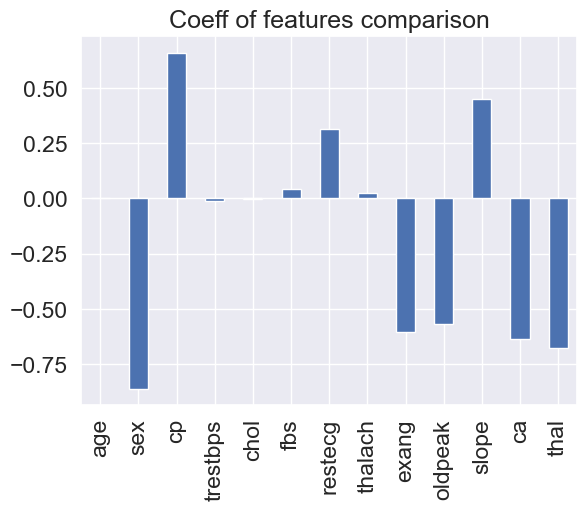

In [69]:
# VIsualise feature importance
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Coeff of features comparison", 
                      legend = False)

In [70]:
from sklearn.inspection import permutation_importance

In [71]:
model_ins = permutation_importance(gs_log_reg, X_test, y_test)

In [72]:
model_ins

{'importances_mean': array([0.        , 0.02295082, 0.05901639, 0.        , 0.        ,
        0.        , 0.01311475, 0.06557377, 0.02622951, 0.03606557,
        0.00655738, 0.07213115, 0.02295082]),
 'importances_std': array([0.        , 0.00803111, 0.0167181 , 0.        , 0.        ,
        0.        , 0.00655738, 0.01036812, 0.01311475, 0.01226773,
        0.00803111, 0.02663619, 0.0167181 ]),
 'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.01639344, 0.01639344, 0.01639344, 0.03278689, 0.03278689],
        [0.03278689, 0.06557377, 0.06557377, 0.08196721, 0.04918033],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.01639344, 0.01639344, 0.01639344, 0.        , 0.01639344],
        [0.06557377, 0.04918033, 0.06557377, 0.06557377, 0.08196721],
        [0.03278689, 0

## Experimentation

If you didn't reach your evaluation metric goal, Ask yourself -

* Can you collect more data
* Could try a better model? Like catboost or XGboost
* Could we further improve our model
* If our model is good enough and we meet our evaluation metrics, how to export it?

In [73]:
import numpy
from catboost import CatBoostRegressor

In [74]:
from catboost import CatBoostClassifier

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
# Setup random seed
np.random.seed(42)

# Split the data into X and y
X = df.drop("target", axis = 1)
y = df["target"]

# split into train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Insantiate the model 
clf = CatBoostClassifier()

# fit the model
clf.fit(X_train, y_train)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 146ms	remaining: 2m 25s
1:	learn: 0.6846994	total: 148ms	remaining: 1m 14s
2:	learn: 0.6804470	total: 152ms	remaining: 50.4s
3:	learn: 0.6762242	total: 154ms	remaining: 38.3s
4:	learn: 0.6716784	total: 155ms	remaining: 30.9s
5:	learn: 0.6672808	total: 157ms	remaining: 26s
6:	learn: 0.6639958	total: 158ms	remaining: 22.4s
7:	learn: 0.6601980	total: 159ms	remaining: 19.8s
8:	learn: 0.6563766	total: 160ms	remaining: 17.7s
9:	learn: 0.6525103	total: 162ms	remaining: 16s
10:	learn: 0.6483670	total: 163ms	remaining: 14.6s
11:	learn: 0.6448827	total: 164ms	remaining: 13.5s
12:	learn: 0.6412767	total: 165ms	remaining: 12.5s
13:	learn: 0.6374286	total: 166ms	remaining: 11.7s
14:	learn: 0.6335427	total: 167ms	remaining: 10.9s
15:	learn: 0.6288052	total: 168ms	remaining: 10.3s
16:	learn: 0.6250489	total: 169ms	remaining: 9.76s
17:	learn: 0.6209495	total: 170ms	remaining: 9.26s
18:	learn: 0.6181899	total: 171ms	remaining: 8.81s
19:	learn: 0.

In [76]:
clf.score(X_test, y_test)

0.8360655737704918

In [77]:
from xgboost import XGBClassifier, XGBRFClassifier

np.random.seed(43)

X = df.drop("target", axis = 1)

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = XGBClassifier()

clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
clf.score(X_test, y_test)

0.8852459016393442

In [79]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0])

In [80]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.8852459016393442

In [81]:
precision_score(y_test, y_preds)

0.8611111111111112

In [82]:
recall_score(y_test, y_preds)

0.9393939393939394

In [83]:
f1_score(y_test, y_preds)

0.8985507246376812

In [84]:
np.random.seed(43)

X = df.drop("target", axis = 1)

y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf1 = XGBRFClassifier()

clf1.fit(X_train, y_train)


XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [85]:
clf1.score(X_test, y_test)

0.8360655737704918